In [ ]:
#Need to install sympy

# **Forward kinematics**


In [ ]:
import sympy as sp
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)
from IPython.display import Image
from sympy.physics.mechanics import dynamicsymbols

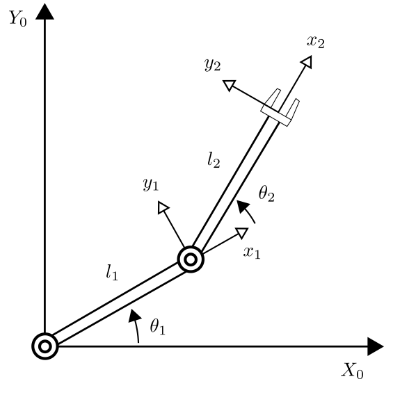

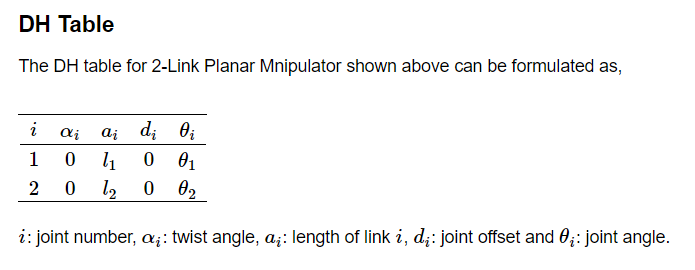

In [ ]:
theta1, theta2, l1, l2, theta, alpha, a, d = dynamicsymbols('theta1 theta2 l1 l2 theta alpha a d')
theta1, theta2, l1, l2, theta, alpha, a, d

(theta1, theta2, l1, l2, theta, alpha, a, d)

In [ ]:
#Standard Homogeneous transformation matrix is given by the rotation 3x3, translation 3x1, and the 4x4 transformation
rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta),a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)   #here we are building the generic formula of the homogeneous transformation matrix
m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

In [ ]:
#Transformation from frame 0 to 1:
m01 = m.subs({alpha:0, a:l1, theta:theta1, d:0})
m01

Matrix([
[cos(theta1), -sin(theta1), 0, l1*cos(theta1)],
[sin(theta1),  cos(theta1), 0, l1*sin(theta1)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [ ]:
#Transformation from frame 1 to 2:
m12 = m.subs({alpha:0, a:l2, theta:theta2, d:0})
m12

Matrix([
[cos(theta2), -sin(theta2), 0, l2*cos(theta2)],
[sin(theta2),  cos(theta2), 0, l2*sin(theta2)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [ ]:
#Transformation from 0 to 2:
m02 = (m01*m12)
m02

Matrix([
[-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), -sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1), 0, l1*cos(theta1) - l2*sin(theta1)*sin(theta2) + l2*cos(theta1)*cos(theta2)],
[ sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1), -sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), 0, l1*sin(theta1) + l2*sin(theta1)*cos(theta2) + l2*sin(theta2)*cos(theta1)],
[                                                 0,                                                  0, 1,                                                                        0],
[                                                 0,                                                  0, 0,                                                                        1]])

In [ ]:
#To simplify the equations, we can use the function .simplify() for each item in the matrix:
mbee= sp.Matrix([[m02[0,0].simplify(), m02[0,1].simplify(), m02[0,2].simplify(), sp.trigsimp(m02[0,3].simplify())],
                 [m02[1,0].simplify(), m02[1,1].simplify(), m02[1,2].simplify(), sp.trigsimp(m02[1,3].simplify())],
                 [m02[2,0].simplify(), m02[2,1].simplify(), m02[2,2].simplify(), m02[2,3].simplify()]])

mbee

Matrix([
[cos(theta1 + theta2), -sin(theta1 + theta2), 0, l1*cos(theta1) + l2*cos(theta1 + theta2)],
[sin(theta1 + theta2),  cos(theta1 + theta2), 0, l1*sin(theta1) + l2*sin(theta1 + theta2)],
[                   0,                     0, 1,                                        0]])

## Position of the end effector

In [ ]:
#Position in x-direction
px = mbee[0,3]
px

l1*cos(theta1) + l2*cos(theta1 + theta2)

In [ ]:
#Position in y-direction
py = mbee[1,3]
py

l1*sin(theta1) + l2*sin(theta1 + theta2)

In [ ]:
#Position in z-direction
pz = mbee[2,3]
pz

0

In [ ]:
#To evaluate tip position numerically, we make use of Sympy's lambdify function which takes  l1 ,  l2 ,  θ1  and  ϕ1  as arguments.

fx = sp.lambdify((l1, l2, theta1, theta2), px, 'numpy')
fy = sp.lambdify((l1, l2, theta1, theta2), py, 'numpy')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2r = np.deg2rad

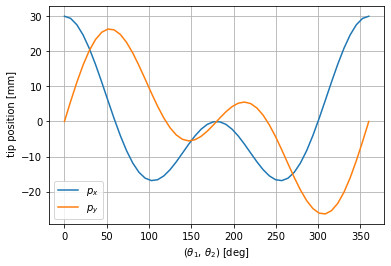

In [ ]:
theta1s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 1
theta2s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 2

zx = np.array(fx(15.0, 15.0, theta1s, theta2s)) #assigning l1 and l2 values of l1=15, l2=15
zy = np.array(fy(15.0, 15.0, theta1s, theta2s))

fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(theta1s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(theta1s), zy, label = r'$p_y$')
ax1.set_xlabel(r'($\theta_1$, $\theta_2$) [deg]')
ax1.set_ylabel(r' tip position [mm]')
plt.legend()
plt.grid()

# **Inverse kinematics**


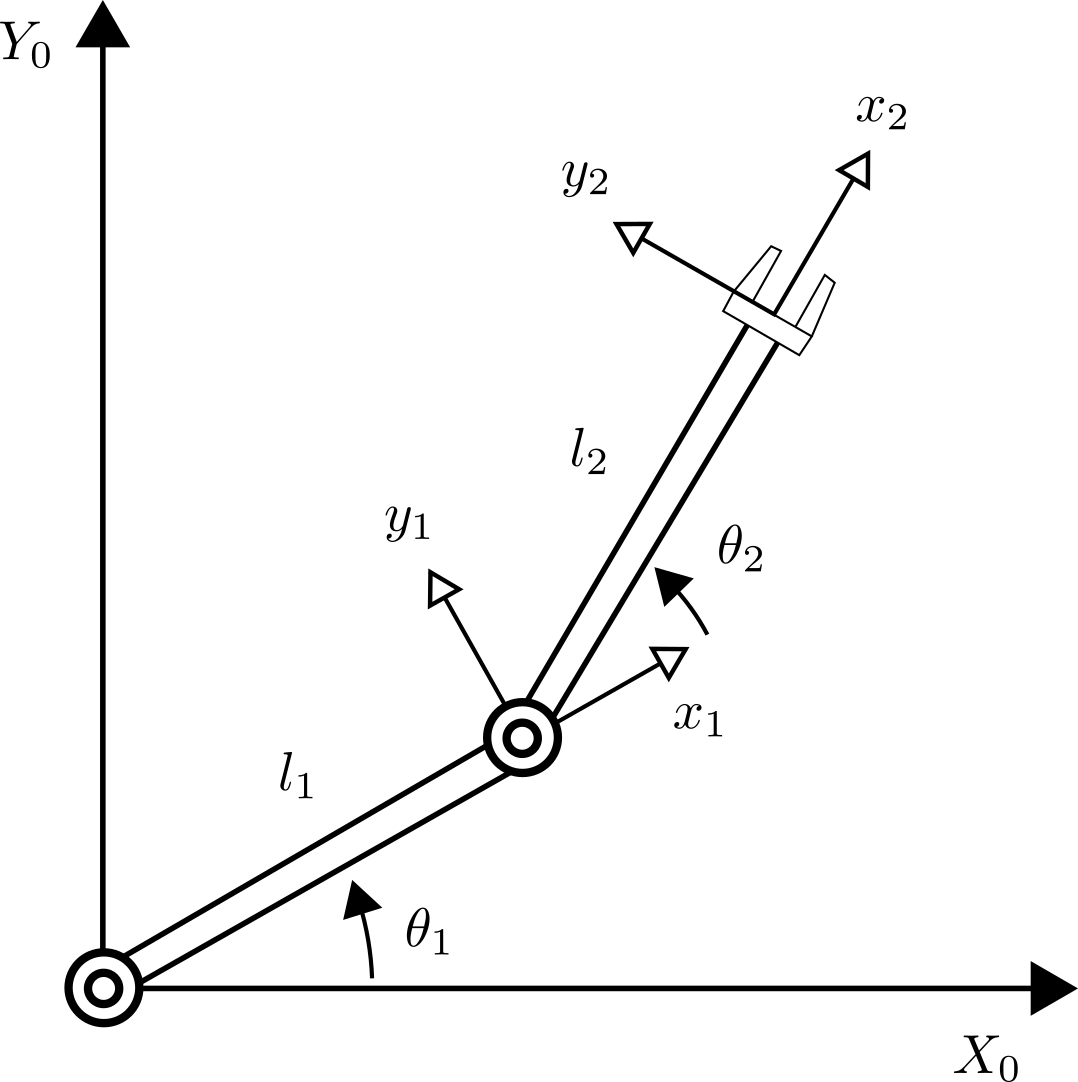

In [ ]:
#Inverse Kinematics

import sympy as sp
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

In [ ]:
#Creating the variables we need for the inverse kinematics

from sympy.physics.mechanics import dynamicsymbols, Point, ReferenceFrame
theta1, theta2, l1, l2, theta, alpha, a, d = dynamicsymbols('theta1 theta2 l1 l2 theta alpha a d')
theta1, theta2, l1, l2, theta, alpha, a, d

(theta1, theta2, l1, l2, theta, alpha, a, d)

In [ ]:
#naming the reference frames
base_frame = ReferenceFrame('B')
shoulder_frame = ReferenceFrame('S')
elbow_frame = ReferenceFrame('E')
hand_frame = ReferenceFrame('H')

hand_frame, elbow_frame,shoulder_frame,base_frame

(H, E, S, B)

In [ ]:
#Defining the frame orientation (all based on Z-axis)

#build the kinematic chain
# .orient(parent, rot_type, amounts, rot_order='')[source]
# https://docs.sympy.org/latest/modules/physics/vector/api/classes.html
shoulder_frame.orient(base_frame, 'Axis', [theta1, base_frame.z])
elbow_frame.orient(shoulder_frame, 'Axis', [theta2, shoulder_frame.z])
hand_frame.orient(elbow_frame, 'Axis', [0, elbow_frame.z])

In [ ]:
#Forward Kinematics - Finding the Homogeneous transformation matrix

#A direction cosine matrix (DCM) is a transformation matrix that transforms one coordinate reference frame to another
T02 = base_frame.dcm(hand_frame)
T02.simplify() # <-- the function .simplify() tries to reduce the equations using algebra

Matrix([
[cos(theta1 + theta2), -sin(theta1 + theta2), 0],
[sin(theta1 + theta2),  cos(theta1 + theta2), 0],
[                   0,                     0, 1]])

In [ ]:
#Rigid Body points and Locations
#To derive the FK, we need to define the length of each rigid body. First, we need to define the points that locate each joint: base, should, elbow, and hand

base = Point('O')   # <-- O as origin
shoulder = Point('0') # <-- start from 0 and goes 1, 2, 3, ...
elbow = Point('1')
hand = Point('2')

base, shoulder, elbow, hand

(O, 0, 1, 2)

In [ ]:
#Next we set the position with the Point.set_pos() method, giving the reference point and the vector.
#Remembering the l1 and l2 are the length for the link lengths

#set_pos(otherpoint, value)[source]
#https://docs.sympy.org/latest/modules/physics/vector/api/kinematics.html
shoulder.set_pos(base, 0 * base_frame.x)
elbow.set_pos(shoulder, l1 * shoulder_frame.x)
hand.set_pos(elbow, l2 * elbow_frame.x)

shoulder, elbow, hand

(0, 1, 2)

In [ ]:
#Base to Hand Position
pxy = (hand.pos_from(base).express(base_frame)).simplify()
pxy

(l1*cos(theta1) + l2*cos(theta1 + theta2))*B.x + (l1*sin(theta1) + l2*sin(theta1 + theta2))*B.y

In [ ]:
#Position in x-direction
px = l1*sp.cos(theta1) + l2*sp.cos(theta1 + theta2)
px

l1*cos(theta1) + l2*cos(theta1 + theta2)

In [ ]:
#Position in y-direction
py = l1*sp.sin(theta1) + l2*sp.sin(theta1 + theta2)
py

l1*sin(theta1) + l2*sin(theta1 + theta2)

In [ ]:
#Tip Position Evaluation
#To evaluate tip position numerically, we make use of Sympy's lambdify function which takes  l1 ,  l2 ,  θ1  and  θ2  as arguments.

fx = sp.lambdify((l1, l2, theta1, theta2), px, 'numpy')
fy = sp.lambdify((l1, l2, theta1, theta2), py, 'numpy')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2r = np.deg2rad

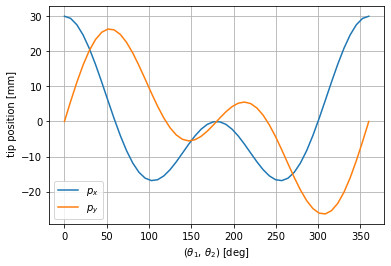

In [ ]:
#here we are generating points from 0 degrees to 360 degrees
theta1s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 1
theta2s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 2

#here we are generating position using l1 = 15, l2 =15, and we are using the theta values generated in the lines before
zx = np.array(fx(15.0, 15.0, theta1s, theta2s))
zy = np.array(fy(15.0, 15.0, theta1s, theta2s))

fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(theta1s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(theta1s), zy, label = r'$p_y$')
ax1.set_xlabel(r'($\theta_1$, $\theta_2$) [deg]')
ax1.set_ylabel(r' tip position [mm]')
plt.legend()
plt.grid()

In [ ]:
#Manipulator Workspace
#The next step is to visualize the workspce of our manipulator. For this purpose, we will import Plotly and make sure that it displays inline plot in our notebook environment.

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # for offline mode in Jupyter Notebook use

import plotly.offline as py
import plotly.graph_objs as go
from numpy import * # Not recommended, but we use to avoid rewriting the forward kinematic equations with prefix 'np'

In [ ]:
#generating the points for theta 1 and theta 2 from 0 to 360
theta11 = np.linspace(d2r(0),d2r(360))
theta22 = np.linspace(d2r(0), d2r(360))
#combining points of theta1 and theta2
theta1, theta2 = np.meshgrid(theta11, theta22)


l_range = [15] # we can use more than one value here, you can with values to see your best design

px1 = {}
py1 = {}
pz1 = {}
for i in l_range:
    l1 = i
    l2 = i - 4   #here you can write l2 according to l1

    #write the inverse kinematics equations here
    pxa = l1*cos(theta1) + l2*cos(theta1 + theta2)
    pya = l1*sin(theta1) + l2*sin(theta1 + theta2)

    #here you are storing all possible values for the end-effector in X and Y axis based on the IK formula (pxa, pya)
    px1['x{0}'.format(i)] = pxa
    py1['x{0}'.format(i)] = pya

    print(px1['x{0}'.format(i)])

[[26.         25.78654036 25.14966644 ... 25.14966644 25.78654036
  26.        ]
 [25.90969015 25.5170937  24.70550728 ... 25.4191131  25.87685021
  25.90969015]
 [25.64024349 25.07293454 24.09392869 ... 25.50942295 25.78654036
  25.64024349]
 ...
 [25.64024349 25.78654036 25.50942295 ... 24.09392869 25.07293454
  25.64024349]
 [25.90969015 25.87685021 25.4191131  ... 24.70550728 25.5170937
  25.90969015]
 [26.         25.78654036 25.14966644 ... 25.14966644 25.78654036
  26.        ]]


In [ ]:
pxx = px1['x15'] #use the same value in the l_range
pyy = py1['x15']
pzz = pyy*0 #dummy zero points for z-axis, as it doesn't exist in our robot case

In [ ]:
#here we are tracing the XYZ points that the robot can reach in the space

trace1 = go.Surface(z=pzz, x=pyy, y=pxx,
                    colorscale='Reds',
                    showscale=False,
                    opacity=0.7,
                   )
data = [trace1]

In [ ]:
#creating the 3D space and labeling
layout = go.Layout(scene = dict(
                    xaxis = dict(title='X (mm)'),
                    yaxis = dict(title='Y (mm)'),
                    zaxis = dict(title='Z (mm)'),
                    ),
                  )

In [ ]:
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig) #use this function if you are not using colab
fig.show(renderer="colab") #use this function if you are using colab

# **Jacobian and Singularity**

In [ ]:
import sympy as sm
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)
from sympy.physics.mechanics import dynamicsymbols

In [ ]:
theta1, theta2, l1, l2 = dynamicsymbols('theta1 theta2 l1 l2')
theta1, theta2, l1, l2

(theta1, theta2, l1, l2)

In [ ]:
#These equations derive from the inverse kinematics that we have found before

px = l1*sm.cos(theta1) + l2*sm.cos(theta1 + theta2) # tip psition in x-direction
py = l1*sm.sin(theta1) + l2*sm.sin(theta1 + theta2) # tip position in y-direction

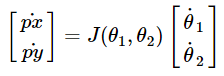

In [ ]:
#using the differential eq. method, we can find the velocities by doing the partial derivative
#So the J(theta1, theta2) matrix can be found by doing:

a11 = sm.diff(px, theta1) # differentiate px with theta_1
a12 = sm.diff(px, theta2) # differentiate px with theta_2

a21 = sm.diff(py, theta1) # differentiate py with theta_1
a22 = sm.diff(py, theta2) # # differentiate py with theta_2

a11, a12, a21, a22

(-l1*sin(theta1) - l2*sin(theta1 + theta2), -l2*sin(theta1 + theta2), l1*cos(theta1) + l2*cos(theta1 + theta2), l2*cos(theta1 + theta2))

In [ ]:
J = sm.Matrix([[a11, a12], [a21, a22]]) # assemble into matix form
Jsim = sm.simplify(J) # use sympy simplification method to obtain simplified results
Jsim

Matrix([
[-l1*sin(theta1) - l2*sin(theta1 + theta2), -l2*sin(theta1 + theta2)],
[ l1*cos(theta1) + l2*cos(theta1 + theta2),  l2*cos(theta1 + theta2)]])

In [ ]:
#Singularities can be found by equaling the determinant of the jacobian matrix to zero
#Then, you solve for the joint variables to find possible values that the determinat is equal to zero
#So, first, we need to find the Jacobian determinat = 0

image.png

In [ ]:
Jdet = sm.det(Jsim) # determinant of Jacobian matrix
detJ = sm.simplify(Jdet)
detJ

l1*l2*sin(theta2)

In [ ]:
sm.solve(detJ, (theta2)) # slove detJ for theta_2

[0, pi]

In [ ]:
#This means the manipulator will be in singular configuration when the angle  θ2  is either zero or it is  ±π

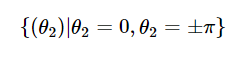

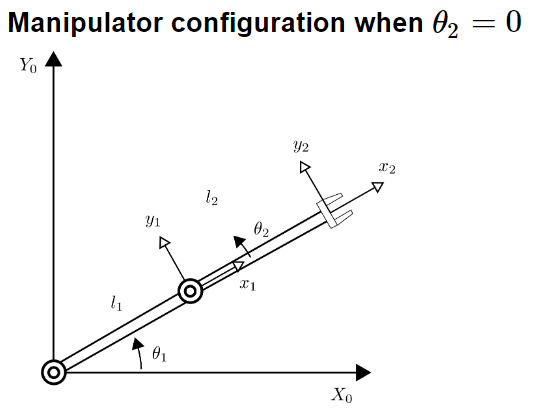

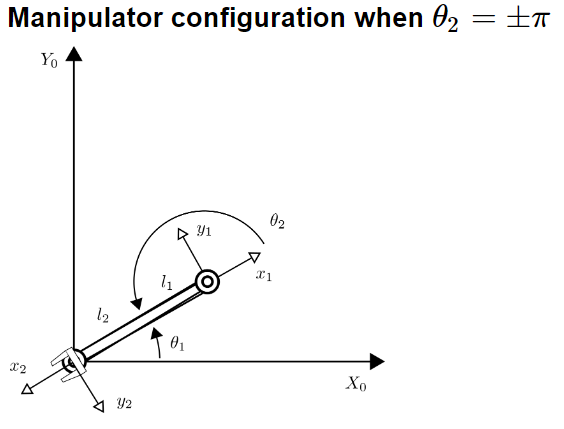